In [12]:
# import the necessary packages
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models as k_models
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

In [13]:
# Generate some data
X, y = make_classification(n_samples=3000, n_features=20, n_redundant=12, n_informative=6, n_repeated=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Stage 1 - > Build and train the first model (Linear Regression)
model1 = LinearRegression()
model1.fit(X_train, y_train) # Train the model Linear Regression

# Use the output of the first model as input for the second model
intermediate_output = model1.predict(X_train).reshape(-1, 1) # Predict the output of the first model and reshape it to 1D array

train_accuracy = model1.score(X_train, y_train) # Calculate accuracy of the first model
print(f'Train Accuracy: {train_accuracy:.2f}')

Train Accuracy: 0.58


In [16]:
# Build the second DNN model

# create a protection for overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Stage 2 - create a DNN model
model2 = k_models.Sequential([
    Input(shape=(intermediate_output.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 classes for classification
])

# Compile the second model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the second model
history = model2.fit(intermediate_output, y_train,
                     epochs=50,
                     batch_size=8,
                     validation_split=0.2,
                     callbacks=[early_stopping], verbose=1)

# Evaluate the final model
intermediate_test_output = model1.predict(X_test).reshape(-1, 1)
loss, accuracy = model2.evaluate(intermediate_test_output, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# predict the output of the second model
predictions = model2.predict(intermediate_test_output)

Test Accuracy: 0.90



Evaluation against Test Dataset :
------------------------------------

Model Accuracy :  0.8983333110809326

Model Loss :  0.2554202377796173
Best epoch :  18


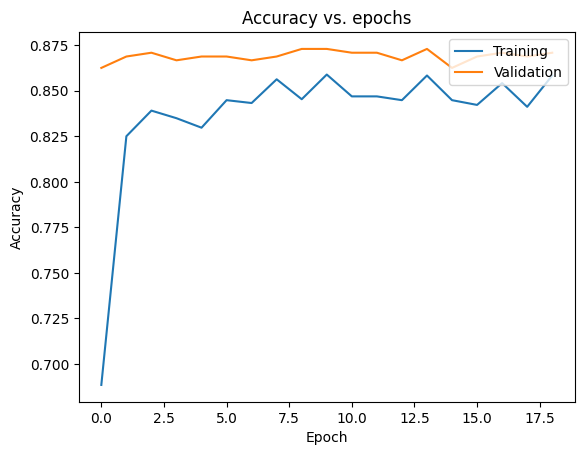

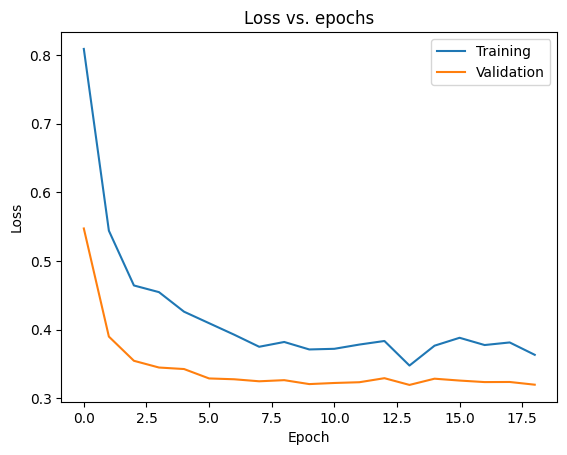

In [17]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")

# Show accuracy of the model
print("\nModel Accuracy : ", accuracy) # 0.87% accuracy
print("\nModel Loss : ", loss) # 0.87% accuracy

# best params
print("Best epoch : ", early_stopping.stopped_epoch)

# plot accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Let's plot the loss over time.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()